<a href="https://colab.research.google.com/github/DanielaJim07/INVESTIGACION_OPERAC/blob/main/Inventario.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q* = 612.3724356957945


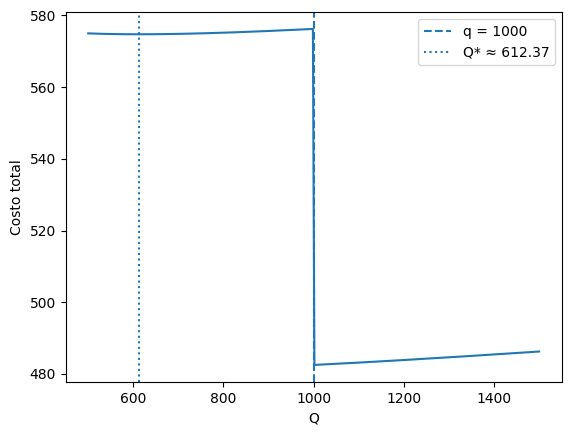

Ecuación simbólica:
Eq(Q1**2 + 2*Q1*(c2*d - g)/h + 2*d*k/h, 0)
Ecuación ya con constantes:
Eq(1.0*Q1**2 - 10599.7448713916*Q1, -375000.0)
Soluciones exactas:
[35.4970848447485, 10564.2477865469]
Soluciones numéricas:
[35.4970848447485, 10564.2477865469]
La política de inventario es pedir:  10564.2477865469  cada que el nivel de inventario baje a:  375.0  unidades


In [1]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np

c1 = 3      # costo unitario antes del descuento
c2 = 2.5    # costo unitario después del descuento
d = 187.5   # demanda anual
h = 0.02    # costo de mantener inventario
k = 20      # costo de ordenar
L = 2       # no lo usas aquí, pero lo dejo
q = 1000    # punto de quiebre del descuento

# Paso 1. Calculamos Q*
def Qop(k, d, h):
    return np.sqrt((2 * k * d) / h)

g = Qop(k, d, h)   # Q* numérico
print("Q* =", g)

# Costo con c1 evaluado en Q* (T1(Q*))
T1_Qstar = c1*d + (k*d/g) + (h*g/2)

# Función de costo total con salto en Q = q
def T(Q, c1, h, k, d, c2, q):
    return np.where(
        Q < q,
        c1 * d + (k * d / Q) + (h * Q / 2),
        c2 * d + (k * d / Q) + (h * Q / 2)
    )

# Gráfica
x = np.linspace(500, 1500, 300)   # amplio el rango para ver bien el salto
plt.plot(x, T(x, c1, h, k, d, c2, q))
plt.axvline(q, linestyle='--', label="q = 1000")
plt.axvline(g, linestyle=':', label=f"Q* ≈ {g:.2f}")
plt.xlabel("Q")
plt.ylabel("Costo total")
plt.legend()
plt.show()

# --------------------- SYMPY ---------------------

# incógnita
Q1 = sp.symbols('Q1')

# parámetros simbólicos (separados de los numéricos)
c2_s, d_s, h_s, k_s, g_s = sp.symbols('c2 d h k g')

# ecuación: Q1^2 + (2/h)*(c2*d - T1(Q*)) * Q1 + 2*k*d/h = 0
eq = sp.Eq(Q1**2 + (2/h_s)*(c2_s*d_s - g_s)*Q1 + 2*k_s*d_s/h_s, 0)

print("Ecuación simbólica:")
print(eq)

# Sustituimos valores numéricos
valores = {
    c2_s: 2.5,
    d_s: 187.5,
    h_s: 0.02,
    k_s: 20,
    g_s: T1_Qstar     # aquí va T1(Q*), no Q*
}

eq_num = sp.simplify(eq.subs(valores))
print("Ecuación ya con constantes:")
print(eq_num)

# Resolver para Q1
sol = sp.solve(eq_num, Q1)
print("Soluciones exactas:")
print(sol)

# Aproximaciones numéricas
sol_num = [s.evalf() for s in sol]
print("Soluciones numéricas:")
print(sol_num)
solucion=sol_num[1]


#Caculamos los valores t* y L_e para determinar la política de inventario
ts=T1_Qstar/d
n=np.floor(L/ts)
L_e=L-n*ts
w=L_e*d
print("La política de inventario es pedir: ", solucion, " cada que el nivel de inventario baje a: ", w," unidades")